# 1. WEAT score 코드로 구현하기

In [63]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

print("슝~")

슝~


## (1) target, attribute 정의
* two target 단어 셋 X, Y
* two attribute 단어 셋 A, B

단어셋을 정할 때는 두 target 셋의 크기가 같아야 하고,
두 attribute 셋의 크기가 같아야 함.

-----

* targets
 - X set(꽃) : 장미, 튤립, 백합, 데이지
 - Y set(곤충) : 거미, 모기, 파리, 메뚜기
* attributes
 - A set(유쾌) : 사랑, 행복, 웃음
 - B set(불쾌) : 재난, 고통, 증오

In [64]:
# 위 단어들의 임베딩(벡터 공간에 끼워넣기) 결과가 다음과 같다고 해봅시다.

target_X = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_Y = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_A = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_B = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

print("슝~")

슝~


In [65]:
X = np.array([v for v in target_X.values()])
Y = np.array([v for v in target_Y.values()])
print(X)
print(Y)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [66]:
A = np.array([v for v in attribute_A.values()])
B = np.array([v for v in attribute_B.values()])
print(A)
print(B)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


## (2) WEAT score값 계산

In [67]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

print(s(target_X['장미'], A, B)) # s('장미', A, B) 계산

0.6457646122337399


[결과 이해]
WEAT score 값이 양수 -> target_X에 있는 '장미'라는 단어는 attribute_B(불쾌)보다 attribute_A(유쾌)와 더 가깝다.

In [68]:
print(s(target_Y['거미'], A, B)) # target_Y에 있는 '거미'와 attribute_A, attribute_B와의 관계를 계산

-0.794002342033094


[결과 이해]
WEAT score 값이 음수 -> '거미'는 attribute_B와 더 가깝다

## (3) 평균값
* target_X와 attribute_A, attribute_B 사이의 평균값
* target_Y와 attribute_A, attribute_B 사이의 평균값

그것이 알고싶다!

In [69]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3)) # target_X와 attribute_A, attribute_B 사이의 평균값

[0.29551989 0.51723181 0.26499096 0.50924109]
0.397


In [70]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3)) # target_Y와 attribute_A, attribute_B 사이의 평균값

[-0.44713039 -0.28310853 -0.33144878 -0.26030641]
-0.33


## (4) WEAT score의 수식 전체 구현

In [71]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.932


[결과 이해]
WEAT score가 매우 높게 나온 것을 알 수 있습니다. 즉, 꽃은 유쾌한 단어와 상대적으로 가깝고, 곤충은 불쾌한 단어와 가깝다는 것을 수치적으로 확인할 수 있었습니다. 

## (5) 시각화
PCA(??누구인가)를 통해 5차원이었던 벡터를 2차원으로 줄여 그림그리기

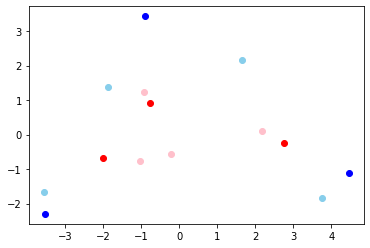

In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')

[결과 이해]
파란색 점(A)과 하늘색 점(X)이 가깝고, 빨간색 점(B)과 분홍색 점(Y)이 가깝게 표현된 것을 확인할 수 있음

# 2. WEAT score 계산 -> Pretrained Word Embedding 모델

## (1) 모델 불러오기
구글에서 학습한 w2v 모델

In [73]:
import os

data_dir = '~/aiffel/weat' 
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. (default = 3,000,000) 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

In [74]:
w2v

## (2) 모델 크기 확인
* 모델에 있는 단어 개수
* 벡터 크기

In [75]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. (https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4)
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
print(w2v.vectors.shape)

500000
300
(500000, 300)


[결과 이해]
* 단어 개수 = limit으로 지정한 개수
* 각 단어는 300차원을 가짐

## (3) 단어 확인

In [76]:
w2v['happy'] # 'happy'라는 단어의 벡터 확인

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [77]:
w2v.most_similar(positive=['happy']) # 'happy'와 가장 유사한 단어 확인

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

In [78]:
w2v.most_similar(positive=['family']) # 다른 단어도 살펴보기

[('relatives', 0.6662653088569641),
 ('familiy', 0.6517067551612854),
 ('families', 0.6252894997596741),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065612435340881),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.5762072205543518),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

[결과 이해]
familiy -> '오타같지만, 데이터 자체에서는 자주 나와서 데이터셋에 포함되었나보구나'

In [79]:
w2v.most_similar(positive=['school']) # 다른 단어도 살펴보기

[('elementary', 0.7868632078170776),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529811024665833),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301522850990295),
 ('classroom', 0.6281620264053345),
 ('Schools', 0.6172096133232117)]

[결과 이해]
이 모델이 단어의 '뜻'을 담은 '벡터'로 변환을 잘 한듯?

## (4) 편향성 확인
WEAT score 계산 -> 이 모델!
① 단어셋 구성(target, attribute 정의)
② WEAT score값 계산

In [80]:
target_X = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_Y = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_A = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_B = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.2624874

다른 셋도 구성해보자
① 단어셋 구성(target, attribute 정의)
② WEAT score값 계산

In [81]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy'] # 인스턴트 식품
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome'] # 그 반대
attribute_A = ['junk', 'canned', 'convenience', 'frozen', 'fast'] # 인스턴트를 뜻하는 단어
attribute_B = ['health', 'beneficial', 'good', 'nourishing', 'nutritious'] # 그 반대

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.6909266

[결과 이해]
상당히 높은 수치 -> 인스턴트 식품의 예시와 인스턴트를 뜻하는 단어가 가까운 것은 당연하므로 이 경우는 모델이 편향되어있다기보다 단어의 뜻을 잘 파악했다고 볼 수 있음

다른 셋도 구성해보자 - (위와) 같은 셋에 다른 attribute 셋 구성
① 단어셋 구성(target, attribute 정의)
② WEAT score값 계산

In [82]:
target_X = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_Y = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_A = ['book', 'essay', 'dictionary', 'magazine', 'novel'] # 책과 관련된 단어
attribute_B = ['news', 'report', 'statement', 'broadcast', 'word'] # 뉴스와 관련된 단어

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

-0.05137869

[결과 이해]
0에 굉장히 가까운 결과 -> 임베딩 모델이 판단하기에, 어느것끼리 가깝다고 말할 수 없는 것

다른 셋도 구성해보자 - 나만의 target, attribute셋 만들기
① 단어셋 구성(target, attribute 정의)
② WEAT score값 계산

In [84]:
target_X = ['excited', 'nervous', 'negative', 'worried', 'anxious', 'mad'] # 긴장상태
target_Y = ['calm', 'relaxed', 'peaceful', 'hopeful', 'positive', 'joyful'] # 그 반대
attribute_A = ['work', 'homework', 'assignment', 'task', 'fight', 'arguement'] # 긴장상태를 유발하기 쉬운 상황을 뜻하는 단어
attribute_B = ['hug', 'nap', 'meditation', 'massage', 'rest', 'spooning'] # 이완상태를 유발하기 쉬운 상황을 뜻하는 단어

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)

1.1922091

In [86]:
'''
# 나중에 히트맵 그려보자

import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax
'''

"\n# 나중에 히트맵 그려보자\n\nimport numpy as np; \nimport seaborn as sns; \n\nnp.random.seed(0)\n\n# 한글 지원 폰트\nsns.set(font='NanumGothic')\n\n# 마이너스 부호 \n\nplt.rcParams['axes.unicode_minus'] = False\n\nax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')\nax\n"

In [87]:
'''
# 복붙용 셀

target_X = [# TODO : 입력해 주세요!!]
target_Y = [# TODO : 입력해 주세요!!]
attribute_A = [# TODO : 입력해 주세요!!]
attribute_B = [# TODO : 입력해 주세요!!]

X = np.array([w2v[word] for word in target_X])
Y = np.array([w2v[word] for word in target_Y])
A = np.array([w2v[word] for word in attribute_A])
B = np.array([w2v[word] for word in attribute_B])

weat_score(X, Y, A, B)
'''

'\n# 복붙용 셀\n\ntarget_X = [# TODO : 입력해 주세요!!]\ntarget_Y = [# TODO : 입력해 주세요!!]\nattribute_A = [# TODO : 입력해 주세요!!]\nattribute_B = [# TODO : 입력해 주세요!!]\n\nX = np.array([w2v[word] for word in target_X])\nY = np.array([w2v[word] for word in target_Y])\nA = np.array([w2v[word] for word in attribute_A])\nB = np.array([w2v[word] for word in attribute_B])\n\nweat_score(X, Y, A, B)\n'

In [88]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


# 3. WEAT score 계산 -> 직접 만드는 Word Embedding

## (1) 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기

* 데이터셋 불러오기
* 데이터셋 확인
* 품사가 명사인 부분만 남겨 tokenized라는 변수명으로 저장 (konlpy 패키지이용)

In [91]:
import os # [기본 모듈 os] 
# 운영체제에서 제공되는 여러 기능을 파이썬에서 수행시켜주는 파이썬 라이브러리(모듈) 
# -> 운영체제에서 자연스럽게 하던 작업들을 코드에서도 활용할 수 있게 해준다. 
#ex) 파일 복사, 폴더 생성, 폴더 내 파일 목록 구하기 등등


# 데이터셋 - 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보(synopsis.txt(대략 17MB))
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file: # 파일의 일부를 읽기
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [92]:
# 약 15분정도 걸립니다.

from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file: # 파일의 일부를 읽기
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

print("슝~")

슝~


In [93]:
print(len(tokenized))

71156


## (2) 추출된 결과로 embedding model 만들기

In [94]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.8893564939498901),
 ('다큐멘터리', 0.8430765271186829),
 ('드라마', 0.8165594339370728),
 ('영화로', 0.7953892946243286),
 ('인칭', 0.7672076225280762),
 ('감동', 0.7664507031440735),
 ('주제', 0.7658935785293579),
 ('소재', 0.7607913017272949),
 ('코미디', 0.7567353248596191),
 ('설정', 0.7487142086029053)]

[결과 이해]
나만의 Word2Vec이 잘 훈련된 것 같나요? 다른 단어를 통해 살펴봅시다.

In [152]:
model.wv.most_similar(positive=['사랑']) # '사랑'와 가장 유사한 단어 확인

[('행복', 0.7154390811920166),
 ('진심', 0.7007576823234558),
 ('애정', 0.6917727589607239),
 ('토마슈', 0.6900383234024048),
 ('연애', 0.6896344423294067),
 ('첫사랑', 0.6822499632835388),
 ('만남', 0.6813235878944397),
 ('전남자친구', 0.6787745356559753),
 ('운명', 0.6744644641876221),
 ('아르튬', 0.6726248860359192)]

In [96]:
model.wv.most_similar(positive=['연극']) # 다른 단어도 확인

[('시나리오', 0.8961197733879089),
 ('영화감독', 0.8795152902603149),
 ('배우', 0.8741592168807983),
 ('데뷔', 0.8724717497825623),
 ('영감', 0.8714386820793152),
 ('공연', 0.8575335741043091),
 ('캐스팅', 0.8574250936508179),
 ('각색', 0.8551990389823914),
 ('대본', 0.8541846871376038),
 ('오페라', 0.8526529669761658)]

## (3) TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

### ⓪ 데이터셋 -> 단어셋 두 축의 기준 정하기

* WEAT score를 계산하려면 단어셋(target 2개, attribute 2개)을 만들어 주어야 한다. 
* 그런데 이 단어셋 두 축은 무엇을 기준으로 정할까? 

---
여기서는 영화 장르, 영화 구분 정보를 두축으로 이용하기로 한다.
* 영화 구분 정보란 일반영화, 예술영화, 독립영화로 구분되는 정보 (KOBIS 제공)
 - synopsis_art.txt : 예술영화 -> target으로 삼기로 한다.
 - synopsis_gen.txt : 일반영화(상업영화) -> 예술영화와 반대되는 target으로 삼기로 한다.
 - 그 외는 독립영화 등으로 분류됩니다.

* 장르 구분
 - synopsis_SF.txt : SF
 - synopsis_가족.txt : 가족
 - synopsis_공연.txt : 공연
 - synopsis_공포(호러).txt : 공포(호러)
 - synopsis_기타.txt: 기타
 - synopsis_다큐멘터리.txt: 다큐멘터리
 - synopsis_드라마.txt: 드라마 -> attribute 로 삼겠습니다.
 - synopsis_멜로로맨스.txt: 멜로로맨스
 - synopsis_뮤지컬.txt: 뮤지컬
 - synopsis_미스터리.txt: 미스터리
 - synopsis_범죄.txt: 범죄
 - synopsis_사극.txt: 사극
 - synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
 - synopsis_성인물(에로).txt: 성인물(에로)
 - synopsis_스릴러.txt: 스릴러
 - synopsis_애니메이션.txt: 애니메이션
 - synopsis_액션.txt: 액션 -> 드라마와 반대되는 attribute로 삼기로 합니다. (즉, 드라마 장르에는 예술영화적 성격이 강하고, 액션 장르에는 일반(상업)영화적 성격이 강할 것이라는 편향성이 워드 임베딩 상에 얼마나 나타나고 있는지를 측정해보겠다는 것입니다!)
 - synopsis_어드벤처.txt: 어드벤처
 - synopsis_전쟁.txt: 전쟁
 - synopsis_코미디.txt: 코미디
 - synopsis_판타지.txt: 판타지

### ① target, attribute 정의
* 'synopsis_art.txt'파일
* 'synopsis_gen.txt'파일

In [99]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

# 'synopsis_art.txt' 파일을 읽어 명사에 대해서만 추출하여 art 변수에 할당
# 'synopsis_gen.txt'파일을 읽어 명사에 대해서만 추출하여 gen 변수에 할당

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

print("슝~")

슝~


In [102]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


* WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요
* 그런데 X, Y, A, B를 가장 잘 대표하는 단어는 어떻게 골라낼까?
 - 정해진 방법은 없음
 - 이번 경우에는 예술영화, 상업영화라는 영화 구분별로 시놉시스를 모아 데이터를 구성 -> '예술영화를 잘 대표하는 단어로는 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화(ex. 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당하지 않을까?' -> 이것과 비슷한 개념의 단어 분석 방식으로 TF-IDF가 있었지! (코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정. 하지만 이 방식이 최선이라는 의미는 아님!) 

In [103]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [104]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

[결과 이해]
* 중복 발생 : 두 개념을 대표하는 단어를 TF-IDF가 높은 순으로 추출하고 싶었던 건데, 양쪽에 중복된 단어가 너무 많다! 
* 두 개념축이 대조되도록 대표하는 단어 셋을 만들고 싶은 거라, 단어가 서로 중복되지 않게 단어셋을 추출하자 : 우선, 상위 100개 단어 중 중복되는 단어를 제외시킨 뒤, 상위 n(=15)개의 단어를 추출

In [106]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

잘 처리가 되었을까? 추출된 단어를 살펴보자

In [107]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [108]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


* 장르별 대표 단어를 추출
 - 드라마, 액션 장르를 다루어 보려고 하지만, 이 두개만 고려하기보다는, 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 단어를 선택하는 데 더 유리할 것! -> 이번에는 주요 장르 5개를 고려해보자.

In [109]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

print("슝~")

슝~


In [110]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [111]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [112]:
# 각 장르를 대표하는 단어들을 추출

m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


[결과 이해]
* 우리의 직관과 데이터에 있는 단어들이 잘 맞는 듯
* 중복이 있긴 하지만 art, gen 단어셋 두 개를 추출할 때에 비하면 적은 편 -> 중복을 체크하여 삭제하기보다는 그대로 사용하는 걸로

## (4) embedding model과 단어 셋으로 WEAT score 구해보기
* target_X는 art, target_Y는 gen, attribute_A는 '드라마', attribute_B는 '액션으로 정해주기
* target_X는 art, target_Y는 gen으로 고정하고 attribute_A, attribute_ B를 바꿔가면서 구해보자
* 구한 결과는 21x21 매트릭스 형태로 표현 -> matrix라는 변수에 담기

In [113]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]
print("슝~")

슝~


In [114]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

print("슝~")

슝~


In [115]:
# WEAT score값
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -0.85988027
드라마 액션 -0.030086357
드라마 코미디 -0.0011633638
드라마 전쟁 0.44934797
드라마 공포(호러) -0.1799178
멜로로맨스 액션 0.76797146
멜로로맨스 코미디 0.93449473
멜로로맨스 전쟁 0.8193039
멜로로맨스 공포(호러) 0.77849257
액션 코미디 0.040815342
액션 전쟁 0.61629295
액션 공포(호러) -0.21773721
코미디 전쟁 0.5059537
코미디 공포(호러) -0.28897583
전쟁 공포(호러) -0.57409644


[결과 이해]
WEAT score가 0.8이상, -0.8이하의 경우만 해석해보자면, 
* 예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있음. 부호가 마이너스이므로 사람의 편향과 반대라는 것을 알 수 있음
* 예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있습니다.
* 예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.

시각화

<AxesSubplot:>

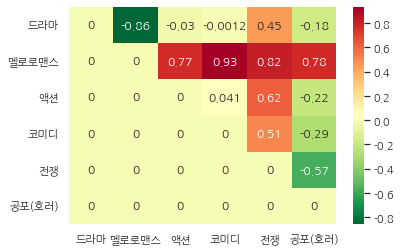

In [116]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 4. 프로젝트 : 모든 장르 간 편향성 측정

In [117]:
# 라이브러리 가져오기
import konlpy
import gensim
import sklearn
import seaborn

# 버전 확인
print(konlpy.__version__)
print(gensim.__version__)
print(sklearn.__version__)
print(seaborn.__version__)

0.5.2
4.1.2
1.0
0.11.2


## (1) 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [119]:
import os # [기본 모듈 os] 
# 운영체제에서 제공되는 여러 기능을 파이썬에서 수행시켜주는 파이썬 라이브러리(모듈) 
# -> 운영체제에서 자연스럽게 하던 작업들을 코드에서도 활용할 수 있게 해준다. 
#ex) 파일 복사, 폴더 생성, 폴더 내 파일 목록 구하기 등등

# 데이터 불러오기
# 데이터셋 - 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보(synopsis.txt(대략 17MB))
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file: # 파일의 일부를 읽기
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [120]:
# 패키지 임포트
from konlpy.tag import Okt
# okt로 토크나이즈
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file: # 파일의 일부를 읽기
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

print("슝~")

슝~


## (2) 추출된 결과로 embedding model 만들기

In [121]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
# model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
# model.most_similar(positive=['영화'])

[('작품', 0.886642575263977),
 ('다큐멘터리', 0.8449102640151978),
 ('드라마', 0.8144479990005493),
 ('영화로', 0.7999438047409058),
 ('코미디', 0.7837580442428589),
 ('형식', 0.7800727486610413),
 ('감동', 0.7757805585861206),
 ('소설', 0.7677150964736938),
 ('차이밍량', 0.7656723260879517),
 ('실화', 0.7641165256500244)]

In [153]:
model.wv.most_similar(positive=['사랑']) # '사랑'과 가장 유사한 단어 확인

[('행복', 0.7154390811920166),
 ('진심', 0.7007576823234558),
 ('애정', 0.6917727589607239),
 ('토마슈', 0.6900383234024048),
 ('연애', 0.6896344423294067),
 ('첫사랑', 0.6822499632835388),
 ('만남', 0.6813235878944397),
 ('전남자친구', 0.6787745356559753),
 ('운명', 0.6744644641876221),
 ('아르튬', 0.6726248860359192)]

In [154]:
model.wv.most_similar(positive=['연극']) # 다른 단어도 확인

[('영화감독', 0.8957222700119019),
 ('시나리오', 0.8837898969650269),
 ('배우', 0.8770355582237244),
 ('영감', 0.8764627575874329),
 ('데뷔', 0.8758756518363953),
 ('연기', 0.8754725456237793),
 ('캐스팅', 0.8712537884712219),
 ('팬', 0.8670289516448975),
 ('차이밍량', 0.8621321320533752),
 ('각색', 0.8608320951461792)]

## (3) target, attribute 단어 셋 만들기

In [123]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 예술영화, 상업영화 읽기
# 'synopsis_art.txt' 파일을 읽어 명사에 대해서만 추출하여 art 변수에 할당
# 'synopsis_gen.txt'파일을 읽어 명사에 대해서만 추출하여 gen 변수에 할당

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name): # 문장단위로 읽은 뒤 명사로 쪼개는 함수
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [124]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [125]:
# Tfidf 객체 생성
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen]) # 예술영화와 상업영화 fit과 transform을 동시에 수행

print(X.shape)

(2, 41082)


In [126]:
# 영화 키워드로 index 확인
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [127]:
m1 = X[0].tocoo()   # art(예술영화)를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen(상업영화)을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art(예술영화)를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen(상업영화)을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [128]:
# 상위 100개의 단어들 중 중복되는 단어를 제외하고 상위 n(=15)개의 단어를 추출
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [129]:
print(target_art) # 예술영화 유니크 단어

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [130]:
print(target_gen) # 상업영화 유니크 단어

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


* 장르별 대표 단어를 추출
 - 드라마, 액션 장르를 다루어 보려고 하지만, 이 두개만 고려하기보다는, 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 단어를 선택하는 데 더 유리할 것! -> 이번에는 모든 장르를 고려해보자.

In [131]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [132]:
# 약 10분정도 걸립니다. -> *4~5
# 장르별 명사 추출
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [133]:
# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [134]:
# 각 장르를 대표하는 단어들을 추출

m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

[결과 이해]
* 우리의 직관과 데이터에 있는 단어들이 잘 맞는 듯
* 중복이 있긴 하지만 art, gen 단어셋 두 개를 추출할 때에 비하면 적은 편 -> 중복을 체크하여 삭제하기보다는 그대로 사용하는 걸로

## (4) WEAT score 계산과 시각화
* 영화 구분, 영화 장르에 따른 편향성을 측정
* Heatmap 형태로 시각화
 - 이때, 편향성이 두드러지는 영화장르 attribute 구성에는 어떤 케이스가 있는지 시각적으로 두드러지게 구성되면 좋습니다.

* target_X는 art, target_Y는 gen, attribute_A는 '드라마', attribute_B는 '액션으로 정해주기
* target_X는 art, target_Y는 gen으로 고정하고 attribute_A, attribute_ B를 바꿔가면서 구해보자
* 구한 결과는 21x21 매트릭스 형태로 표현 -> matrix라는 변수에 담기

In [135]:
# 매트릭스 선언
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [136]:
from numpy import dot
from numpy.linalg import norm

# 코사인 유사도 함수
def cos_sim(i, j):
    return dot(i, j.T) / (norm(i)*norm(j))

# 코사인 유사도 비교 함수
def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B

# WEAT score 구현
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)
    
    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return (mean_X - mean_Y) / std_dev

In [138]:
import numpy as np

# numpy array 형태로 변환
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

# 매트릭스 채우기
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [139]:
# 매트릭스 채우기
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 멜로로맨스 -1.3394455
공포(호러) 다큐멘터리 1.1900494
기타 멜로로맨스 -1.1789132
다큐멘터리 멜로로맨스 -1.4979048
다큐멘터리 미스터리 -1.2796687
다큐멘터리 성인물(에로) -1.2447691
다큐멘터리 스릴러 -1.1726202
멜로로맨스 범죄 1.2429675
멜로로맨스 서부극(웨스턴) 1.1707637
멜로로맨스 애니메이션 1.1789484
멜로로맨스 전쟁 1.427478


[결과 이해]
WEAT score가 0.8이상, -0.8이하의 경우만 해석해보자면, 
* 예술영화와 일반영화, 그리고 드라마와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술영화는 멜로로맨스, 일반영화는 드라마와 가깝다고 볼 수 있음. 부호가 마이너스이므로 '사람의 편향과 반대라는 것'(<--??)을 알 수 있음
* 예술영화와 일반영화, 그리고 멜로로맨스와 코미디의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 코디미는 일반 영화와 가깝다고 볼 수 있습니다.
* 예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.

시각화

<AxesSubplot:>

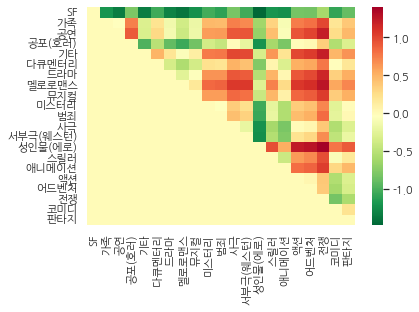

In [151]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, cmap='RdYlGn_r')
ax

In [142]:
len(matrix)

21

In [143]:
len(w1)

18995

In [144]:
len(w2)

37717

In [146]:
w1_, w2_ = [], []
for i in range(len(w1)):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])

for i in range(len(w2)):
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

target_art, target_gen = [], []
for i in range(len(w1)):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

for i in range(len(w2)):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [147]:
import numpy as np

A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [148]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -1.2027555
SF 공연 -1.3493007
SF 기타 -1.3442214
SF 드라마 -1.3148334
SF 멜로로맨스 -1.3883603
SF 뮤지컬 -1.2329937
SF 범죄 -1.1140174
SF 성인물(에로) -1.4768994
SF 스릴러 -1.1967661
SF 애니메이션 -1.2307898
공연 전쟁 1.2102398
공포(호러) 성인물(에로) -1.2175486
기타 전쟁 1.2051327
드라마 전쟁 1.1589382
멜로로맨스 어드벤처 1.1236377
멜로로맨스 전쟁 1.2677822
사극 성인물(에로) -1.2250586
서부극(웨스턴) 성인물(에로) -1.2434068
성인물(에로) 액션 1.2317895
성인물(에로) 어드벤처 1.279907
성인물(에로) 전쟁 1.3926961


<AxesSubplot:>

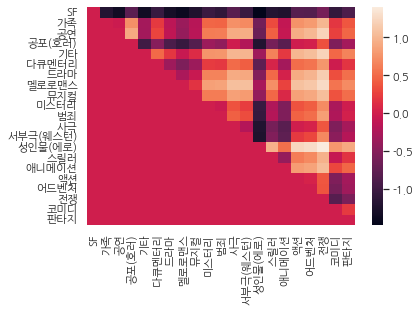

In [149]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="NanumGothic")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name)
ax

In [150]:
len(matrix)

21

# 회고
* 자연어가 컴퓨터가 계산할 수 있는 벡터공간에 맵핑되고, 히트맵을 통해 구현하는 과정이 생각보다 직관적이라서 반가웠다.(ㅎㅎ)
* 심리학 분야에서 이루어진 실험과 연구(IAT(Implicit Association Test))가 컴퓨터 사이언스 분야의 워드 임베딩 문제를 해결했다는 지점이 인상적이었다. 
* 그리고 데이터가 인간의 무의식을 담고 있다는 지점도 무척 흥미로웠다. 데이터가 우리 자신이 우리를 스스로를 아는 것보다 우리를 더 잘 이해할 수 있다고 얘기하는 많은 창작가, 연구자들의 이야기가 떠오른다.

[참고] https://piaojian.tistory.com/37